In [34]:
from datapackage import Package
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
import matplotlib.pyplot as plt                       
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split


package = Package('https://datahub.io/core/natural-gas/datapackage.json')

In [3]:
# print list of all resources:
print(package.resource_names)

['validation_report', 'daily_csv', 'monthly_csv', 'daily_json', 'monthly_json', 'natural-gas_zip', 'daily_csv_preview', 'daily', 'monthly']


In [ ]:
# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())

In [9]:
data_url = 'https://datahub.io/core/natural-gas/datapackage.json'

In [ ]:
# to load Data Package into storage
package = datapackage.Package(data_url)

In [ ]:
# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

In [18]:
data = pd.read_csv("monthly.csv")

In [22]:
data.head()

,Month,Price
0,1997-01,3.45
1,1997-02,2.15
2,1997-03,1.89
3,1997-04,2.03
4,1997-05,2.25


In [23]:
data.tail()

,Month,Price
279,2020-04,1.74
280,2020-05,1.75
281,2020-06,1.63
282,2020-07,1.77
283,2020-08,2.30


In [25]:
print(data.isnull().sum())

Month    0
Price    0
dtype: int64


In [24]:
data = data.fillna(method = 'pad')

<AxesSubplot:xlabel='Month'>

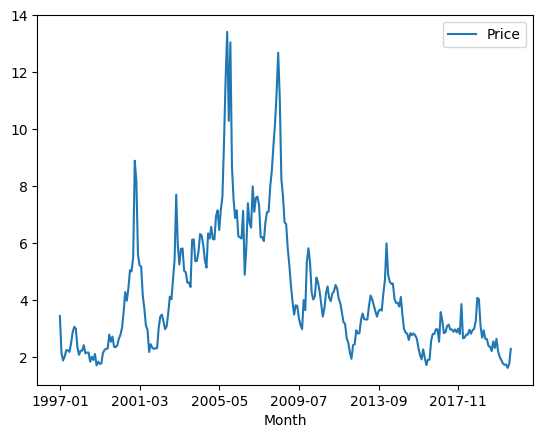

In [30]:
# plotting a bar graph
data.plot(x="Month", y="Price")

Line graph: 


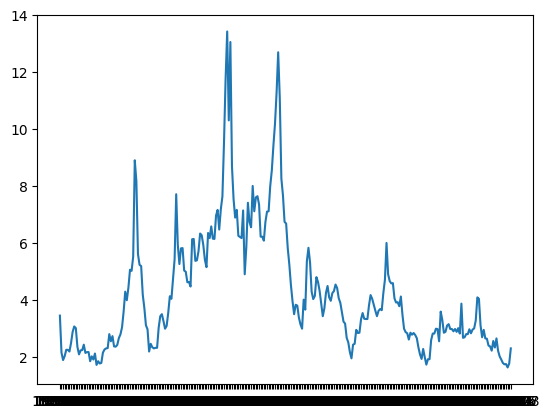

Scatter Plot:  


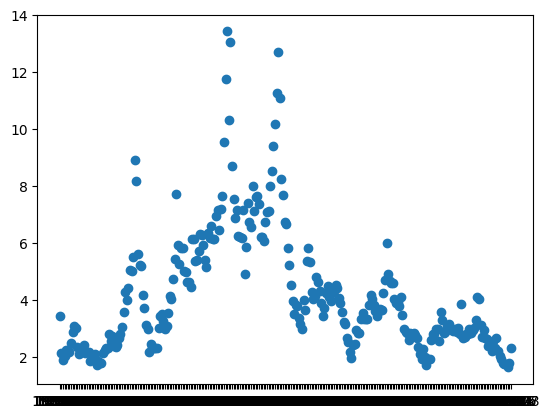

In [31]:
# plotting a line graph
print("Line graph: ")
plt.plot(data["Month"], data["Price"])
plt.show()
  
# plotting a scatter plot
print("Scatter Plot:  ")
plt.scatter(data["Month"], data["Price"])
plt.show()

In [32]:
data.describe()

,Price
count,284.000000
mean,4.207958
std,2.183235
min,1.630000
25%,2.660000
50%,3.560000
75%,5.327500
max,13.420000


In [39]:
train, test = train_test_split(data, test_size=0.2)

In [40]:
len(train)

227

In [41]:
len(test)

57